# Image Classification using CNN

The code for this notebook up to and including the first model was taken from UMGC DATA 640 class. Other elements of the code including the classification matrix, image views, accuracy plots and predictions were adapted from this tutorial: https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python

Here's the data.



In [11]:
import numpy as np
import pandas as pd
import os
import tarfile
import tensorflow.keras 
from tensorflow.keras.datasets import fashion_mnist

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, BatchNormalization, Flatten, Dense
from keras.layers.advanced_activations import LeakyReLU
from sklearn.metrics import classification_report

In [13]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()
train_y = tensorflow.keras.utils.to_categorical(train_y, 10)
test_y = tensorflow.keras.utils.to_categorical(test_y, 10)

In [14]:
train_x.shape

(60000, 28, 28)

In [ ]:
def show(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    from matplotlib import pyplot
    import matplotlib as mpl
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()

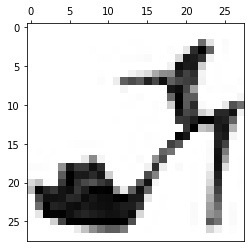

In [ ]:
# Show the image using the function above. 
show(train_x[9])

Text(0.5, 1.0, 'Ground Truth : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]')

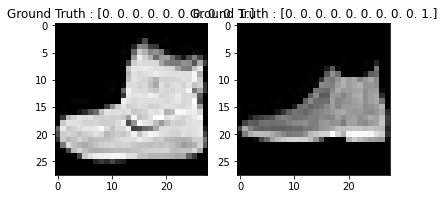

In [ ]:
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_x[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_x[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_y[0]))

<p>Now that we've imported the data, we'll need to start importing what we need from Keras to build our network. Below is a basic network. Note that the images are greyscale, so there is no color channel like there is in some of the other datasets.</p>

<p>Also, since there's no color channel, we'll use "1D" layers not "2D" layers as are used when we have channels for colors.</p>

<p>Now it's time for us to start building the network. Build below is a sample network you can play with as a starting point for your assignment. Feel free to expand on this, or start your own from scratch!</p>

In [ ]:
model = Sequential()
model.add(Conv1D(filters = 236, kernel_size = 2,  input_shape = (28, 28)))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv1D(filters = 128, kernel_size = 2))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(units = 10, activation = 'softmax'))

In [ ]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = tensorflow.keras.optimizers.Adadelta(), 
              metrics = ['accuracy'])

In [ ]:
model.fit(train_x, train_y, epochs = 10, batch_size = 128)

Epoch 1/10
469/469 [==============================] - 2s 5ms/step - loss: 1.0315 - accuracy: 0.6426
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.9974 - accuracy: 0.6532
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.9724 - accuracy: 0.6619
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.9503 - accuracy: 0.6712
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.9281 - accuracy: 0.6776
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.9079 - accuracy: 0.6861
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.8891 - accuracy: 0.6916
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.8773 - accuracy: 0.6958
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 0.8658 - accuracy: 0.6983
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.8519 - accuracy: 0.7038

<p>Now that we've trained the network, lets see how well it works on some unseen data!</p> 

In [ ]:
score = model.evaluate(test_x, test_y)
print('\nloss is: ' + str(score[0]))
print('accuracy is: ' + str(score[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.7272 - accuracy: 0.7439

loss is: 0.7271836996078491
accuracy is: 0.7439000010490417


Here are my models to improve on the above:

In [16]:
model2 = Sequential()

In [17]:
# 1 layers, relu 
# First set of layers
model2.add(Conv1D(filters = 236, kernel_size = 2,  input_shape = (28, 28), activation = 'relu'))
model2.add(MaxPooling1D(pool_size = 2))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())

# Second set of layers
model2.add(Conv1D(filters = 128, kernel_size = 2, activation = 'relu'))
model2.add(MaxPooling1D(pool_size = 2))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())

# Third set of layers
model2.add(Conv1D(filters = 64, kernel_size = 2, activation = 'relu') )
model2.add(MaxPooling1D(pool_size = 2))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())

model2.add(Flatten())
model2.add(Dense(units = 10, activation = 'softmax'))

In [18]:
# Comile the model and set the loss functions, and targets, etc. 
model2.compile(loss = 'categorical_crossentropy', 
              optimizer = tensorflow.keras.optimizers.Adadelta(), 
              metrics = ['accuracy'])

In [19]:
model2.fit(train_x, train_y, epochs = 10, batch_size = 200)

Epoch 1/10
300/300 [==============================] - 2s 5ms/step - loss: 2.9838 - accuracy: 0.1086
Epoch 2/10
300/300 [==============================] - 2s 5ms/step - loss: 2.7479 - accuracy: 0.1411
Epoch 3/10
300/300 [==============================] - 2s 5ms/step - loss: 2.5347 - accuracy: 0.1784
Epoch 4/10
300/300 [==============================] - 1s 5ms/step - loss: 2.3579 - accuracy: 0.2159
Epoch 5/10
300/300 [==============================] - 2s 5ms/step - loss: 2.2066 - accuracy: 0.2551
Epoch 6/10
300/300 [==============================] - 2s 5ms/step - loss: 2.0724 - accuracy: 0.2957
Epoch 7/10
300/300 [==============================] - 2s 5ms/step - loss: 1.9581 - accuracy: 0.3258
Epoch 8/10
300/300 [==============================] - 1s 5ms/step - loss: 1.8638 - accuracy: 0.3532
Epoch 9/10
300/300 [==============================] - 2s 5ms/step - loss: 1.7823 - accuracy: 0.3788
Epoch 10/10
300/300 [==============================] - 2s 5ms/step - loss: 1.7065 - accuracy: 0.4065

In [31]:
score = model2.evaluate(test_x, test_y)
print('\nloss is: ' + str(score[0]))
print('accuracy is: ' + str(score[1]))

313/313 [==============================] - 1s 3ms/step - loss: 1.4105 - accuracy: 0.5389

loss is: 1.410541296005249
accuracy is: 0.5389000177383423


In [22]:
# make predictions
predicted_classes = model2.predict(test_x)
# find the class with highest probability 
predicted_classes1 = np.argmax(np.round(predicted_classes), axis = 1)
actual = np.argmax(np.round(test_y), axis = 1)
correct = np.where(predicted_classes1==actual)[0]

print("Correctly identified %d images" % len(correct))

Correctly identified 2754 images


There is a discrepency between the metrics from the evaluate and predict functions.  Others have had this issue and it is explained here:https://stackoverflow.com/questions/44476706/what-is-the-difference-between-keras-model-evaluate-and-model-predict Seems like the predict function is a better way to go.  The evaluate function is just taking the means of the metrics from each batch.

In [23]:
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(actual, predicted_classes1, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.12      0.99      0.22      1000
     Class 1       1.00      0.33      0.50      1000
     Class 2       0.50      0.06      0.10      1000
     Class 3       0.67      0.00      0.00      1000
     Class 4       0.00      0.00      0.00      1000
     Class 5       0.92      0.29      0.44      1000
     Class 6       0.00      0.00      0.00      1000
     Class 7       0.80      0.43      0.56      1000
     Class 8       0.80      0.08      0.15      1000
     Class 9       0.95      0.57      0.71      1000

    accuracy                           0.28     10000
   macro avg       0.58      0.28      0.27     10000
weighted avg       0.58      0.28      0.27     10000



model 3 has more filters and bigger kernel size.  Layer two has extra filters.

In [25]:
model3 = Sequential()
model3.add(Conv1D(filters = 254, kernel_size = 3,  input_shape = (28, 28), activation = 'relu'))
model3.add(MaxPooling1D(pool_size = 2))
model3.add(Dropout(0.2))
model3.add(BatchNormalization())

# Second set of layers
model3.add(Conv1D(filters = 1175, kernel_size = 3, activation = 'relu'))
model3.add(MaxPooling1D(pool_size = 2))
model3.add(Dropout(0.2))
model3.add(BatchNormalization())

# Third set of layers
model3.add(Conv1D(filters = 84, kernel_size = 3, activation = 'relu') )
model3.add(MaxPooling1D(pool_size = 2))
model3.add(Dropout(0.2))
model3.add(BatchNormalization())

model3.add(Flatten())
model3.add(Dense(units = 10, activation = 'softmax'))

In [26]:
# Comile the model and set the loss functions, and targets, etc. 
model3.compile(loss = 'categorical_crossentropy', 
              optimizer = tensorflow.keras.optimizers.Adadelta(), 
              metrics = ['accuracy'])

In [27]:
model3.fit(train_x, train_y, epochs = 50, batch_size = 180)

Epoch 1/50
334/334 [==============================] - 4s 12ms/step - loss: 2.1239 - accuracy: 0.2897
Epoch 2/50
334/334 [==============================] - 4s 11ms/step - loss: 1.4975 - accuracy: 0.4874
Epoch 3/50
334/334 [==============================] - 4s 11ms/step - loss: 1.2392 - accuracy: 0.5763
Epoch 4/50
334/334 [==============================] - 4s 11ms/step - loss: 1.0944 - accuracy: 0.6252
Epoch 5/50
334/334 [==============================] - 4s 12ms/step - loss: 1.0172 - accuracy: 0.6517
Epoch 6/50
334/334 [==============================] - 4s 12ms/step - loss: 0.9580 - accuracy: 0.6697
Epoch 7/50
334/334 [==============================] - 4s 11ms/step - loss: 0.9121 - accuracy: 0.6849
Epoch 8/50
334/334 [==============================] - 4s 11ms/step - loss: 0.8758 - accuracy: 0.6973
Epoch 9/50
334/334 [==============================] - 4s 12ms/step - loss: 0.8521 - accuracy: 0.7043
Epoch 10/50
334/334 [==============================] - 4s 12ms/step - loss: 0.8290 - accura

In [28]:
score = model3.evaluate(test_x, test_y)
print('\nloss is: ' + str(score[0]))
print('accuracy is: ' + str(score[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.5200 - accuracy: 0.8156

loss is: 0.5200356841087341
accuracy is: 0.8155999779701233


In [29]:
# make predictions
predicted_classes = model3.predict(test_x)
# find the class with highest probability 
predicted_classes1 = np.argmax(np.round(predicted_classes), axis = 1)
actual = np.argmax(np.round(test_y), axis = 1)
correct = np.where(predicted_classes1==actual)[0]

print("Correctly identified %d images" % len(correct))

Correctly identified 7673 images


In [30]:
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(actual, predicted_classes1, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.38      0.89      0.53      1000
     Class 1       0.99      0.91      0.95      1000
     Class 2       0.73      0.57      0.64      1000
     Class 3       0.92      0.75      0.82      1000
     Class 4       0.71      0.57      0.64      1000
     Class 5       0.97      0.91      0.94      1000
     Class 6       0.68      0.31      0.42      1000
     Class 7       0.93      0.90      0.91      1000
     Class 8       0.97      0.92      0.94      1000
     Class 9       0.91      0.95      0.93      1000

    accuracy                           0.77     10000
   macro avg       0.82      0.77      0.77     10000
weighted avg       0.82      0.77      0.77     10000



model 4 continue to increase kernels and filters.  Trying a different optimizer.

In [34]:
model4 = Sequential()
model4.add(Conv1D(filters = 354, kernel_size = 4,  input_shape = (28, 28), activation = 'relu'))
model4.add(MaxPooling1D(pool_size = 2))
model4.add(Dropout(0.2))
model4.add(BatchNormalization())

# Second set of layers
model4.add(Conv1D(filters = 250, kernel_size = 3, activation = 'relu'))
model4.add(MaxPooling1D(pool_size = 2))
model4.add(Dropout(0.2))
model4.add(BatchNormalization())

# Third set of layers
model4.add(Conv1D(filters = 125, kernel_size = 3, activation = 'relu') )
model4.add(MaxPooling1D(pool_size = 2))
model4.add(Dropout(0.2))
model4.add(BatchNormalization())

model4.add(Flatten())
model4.add(Dense(units = 10, activation = 'softmax'))

In [35]:
# Comile the model and set the loss functions, and targets, etc. 
model4.compile(loss = 'categorical_crossentropy', 
              optimizer='adam', 
              metrics = ['accuracy'])

In [36]:
model4_train = model4.fit(train_x, train_y, epochs = 50, batch_size = 200, validation_data=(test_x, test_y))

Epoch 1/50
300/300 [==============================] - 2s 8ms/step - loss: 0.5603 - accuracy: 0.7937 - val_loss: 0.4566 - val_accuracy: 0.8351
Epoch 2/50
300/300 [==============================] - 2s 7ms/step - loss: 0.4146 - accuracy: 0.8467 - val_loss: 0.4083 - val_accuracy: 0.8455
Epoch 3/50
300/300 [==============================] - 2s 7ms/step - loss: 0.3751 - accuracy: 0.8603 - val_loss: 0.3887 - val_accuracy: 0.8570
Epoch 4/50
300/300 [==============================] - 2s 7ms/step - loss: 0.3524 - accuracy: 0.8682 - val_loss: 0.3684 - val_accuracy: 0.8614
Epoch 5/50
300/300 [==============================] - 2s 7ms/step - loss: 0.3304 - accuracy: 0.8765 - val_loss: 0.3522 - val_accuracy: 0.8705
Epoch 6/50
300/300 [==============================] - 2s 7ms/step - loss: 0.3193 - accuracy: 0.8821 - val_loss: 0.3453 - val_accuracy: 0.8657
Epoch 7/50
300/300 [==============================] - 2s 7ms/step - loss: 0.3036 - accuracy: 0.8868 - val_loss: 0.3374 - val_accuracy: 0.8769
Epoch 

In [37]:
score = model4.evaluate(test_x, test_y)
print('\nloss is: ' + str(score[0]))
print('accuracy is: ' + str(score[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.3316 - accuracy: 0.9015

loss is: 0.3316212296485901
accuracy is: 0.9014999866485596


In [38]:
# make predictions
predicted_classes = model4.predict(test_x)
# find the class with highest probability 
predicted_classes1 = np.argmax(np.round(predicted_classes), axis = 1)
actual = np.argmax(np.round(test_y), axis = 1)
correct = np.where(predicted_classes1==actual)[0]

print("Correctly identified %d images" % len(correct))

Correctly identified 8944 images


In [39]:
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(actual, predicted_classes1, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.77      0.81      0.79      1000
     Class 1       0.99      0.97      0.98      1000
     Class 2       0.88      0.78      0.83      1000
     Class 3       0.92      0.89      0.90      1000
     Class 4       0.80      0.86      0.83      1000
     Class 5       0.98      0.99      0.99      1000
     Class 6       0.71      0.73      0.72      1000
     Class 7       0.97      0.97      0.97      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.97      0.97      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.90     10000
weighted avg       0.90      0.89      0.90     10000



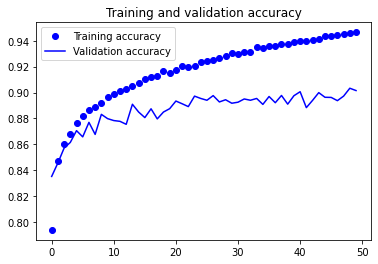

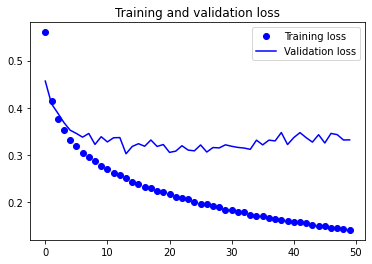

In [40]:
accuracy = model4_train.history['accuracy']
val_accuracy =  model4_train.history['val_accuracy']
loss =  model4_train.history['loss']
val_loss =  model4_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Seems to have overfit.  Lets reduce the batch size and number of epochs.

In [42]:
model5 = Sequential()
model5.add(Conv1D(filters = 354, kernel_size = 4,  input_shape = (28, 28), activation = 'relu'))
model5.add(MaxPooling1D(pool_size = 2))
model5.add(Dropout(0.2))
model5.add(BatchNormalization())

# Second set of layers
model5.add(Conv1D(filters = 250, kernel_size = 3, activation = 'relu'))
model5.add(MaxPooling1D(pool_size = 2))
model5.add(Dropout(0.2))
model5.add(BatchNormalization())

# Third set of layers
model5.add(Conv1D(filters = 125, kernel_size = 3, activation = 'relu') )
model5.add(MaxPooling1D(pool_size = 2))
model5.add(Dropout(0.2))
model5.add(BatchNormalization())

model5.add(Flatten())
model5.add(Dense(units = 10, activation = 'softmax'))
# Comile the model and set the loss functions, and targets, etc. 
model5.compile(loss = 'categorical_crossentropy', 
              optimizer='adam', 
              metrics = ['accuracy'])

In [43]:
model5.fit(train_x, train_y, epochs = 40, batch_size = 180)

Epoch 1/40
334/334 [==============================] - 2s 7ms/step - loss: 0.5475 - accuracy: 0.7988
Epoch 2/40
334/334 [==============================] - 2s 7ms/step - loss: 0.4130 - accuracy: 0.8485
Epoch 3/40
334/334 [==============================] - 2s 7ms/step - loss: 0.3776 - accuracy: 0.8595
Epoch 4/40
334/334 [==============================] - 2s 7ms/step - loss: 0.3502 - accuracy: 0.8699
Epoch 5/40
334/334 [==============================] - 2s 7ms/step - loss: 0.3345 - accuracy: 0.8747
Epoch 6/40
334/334 [==============================] - 2s 7ms/step - loss: 0.3200 - accuracy: 0.8797
Epoch 7/40
334/334 [==============================] - 2s 7ms/step - loss: 0.3063 - accuracy: 0.8846
Epoch 8/40
334/334 [==============================] - 2s 7ms/step - loss: 0.2938 - accuracy: 0.8892
Epoch 9/40
334/334 [==============================] - 2s 7ms/step - loss: 0.2875 - accuracy: 0.8904
Epoch 10/40
334/334 [==============================] - 2s 7ms/step - loss: 0.2774 - accuracy: 0.8964

In [44]:
score = model5.evaluate(test_x, test_y)
print('\nloss is: ' + str(score[0]))
print('accuracy is: ' + str(score[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.3294 - accuracy: 0.8950

loss is: 0.3293610215187073
accuracy is: 0.8949999809265137


In [45]:
# make predictions
predicted_classes = model5.predict(test_x)
# find the class with highest probability 
predicted_classes1 = np.argmax(np.round(predicted_classes), axis = 1)
actual = np.argmax(np.round(test_y), axis = 1)
correct = np.where(predicted_classes1==actual)[0]

print("Correctly identified %d images" % len(correct))
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(actual, predicted_classes1, target_names=target_names))

Correctly identified 8888 images
              precision    recall  f1-score   support

     Class 0       0.73      0.87      0.79      1000
     Class 1       0.99      0.97      0.98      1000
     Class 2       0.77      0.89      0.82      1000
     Class 3       0.91      0.90      0.90      1000
     Class 4       0.89      0.69      0.78      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.74      0.69      0.71      1000
     Class 7       0.97      0.96      0.96      1000
     Class 8       0.99      0.97      0.98      1000
     Class 9       0.96      0.98      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



model 6 has more filters and larger kernel.  The adam optimizer has overfit slightly so dropout is increased.

In [46]:
model6 = Sequential()
model6.add(Conv1D(filters = 454, kernel_size = 4,  input_shape = (28, 28), activation = 'relu'))
model6.add(MaxPooling1D(pool_size = 2))
model6.add(Dropout(0.4))
model6.add(BatchNormalization())

# Second set of layers
model6.add(Conv1D(filters = 350, kernel_size = 4, activation = 'relu'))
model6.add(MaxPooling1D(pool_size = 2))
model6.add(Dropout(0.4))
model6.add(BatchNormalization())

# Third set of layers
model6.add(Conv1D(filters = 125, kernel_size = 3, activation = 'relu') )
model6.add(MaxPooling1D(pool_size = 2))
model6.add(Dropout(0.4))
model6.add(BatchNormalization())

model6.add(Flatten())
model6.add(Dense(units = 10, activation = 'softmax'))
# Comile the model and set the loss functions, and targets, etc. 
model6.compile(loss = 'categorical_crossentropy', 
              optimizer= tensorflow.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ['accuracy'])

In [47]:
model6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 25, 454)           51302     
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 12, 454)           0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 12, 454)           0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 12, 454)           1816      
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 9, 350)            635950    
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 4, 350)            0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 4, 350)           

In [48]:
model6.fit(train_x, train_y, epochs = 50, batch_size = 180)

Epoch 1/50
334/334 [==============================] - 3s 9ms/step - loss: 0.6163 - accuracy: 0.7794
Epoch 2/50
334/334 [==============================] - 3s 9ms/step - loss: 0.4494 - accuracy: 0.8367
Epoch 3/50
334/334 [==============================] - 3s 9ms/step - loss: 0.4073 - accuracy: 0.8525
Epoch 4/50
334/334 [==============================] - 3s 9ms/step - loss: 0.3843 - accuracy: 0.8602
Epoch 5/50
334/334 [==============================] - 3s 9ms/step - loss: 0.3686 - accuracy: 0.8642
Epoch 6/50
334/334 [==============================] - 3s 9ms/step - loss: 0.3543 - accuracy: 0.8705
Epoch 7/50
334/334 [==============================] - 3s 9ms/step - loss: 0.3418 - accuracy: 0.8733
Epoch 8/50
334/334 [==============================] - 3s 9ms/step - loss: 0.3364 - accuracy: 0.8760
Epoch 9/50
334/334 [==============================] - 3s 9ms/step - loss: 0.3251 - accuracy: 0.8789
Epoch 10/50
334/334 [==============================] - 3s 9ms/step - loss: 0.3210 - accuracy: 0.8819

In [49]:
score = model6.evaluate(test_x, test_y)
print('\nloss is: ' + str(score[0]))
print('accuracy is: ' + str(score[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.2859 - accuracy: 0.8986

loss is: 0.285857617855072
accuracy is: 0.8985999822616577


In [50]:
# make predictions
predicted_classes = model6.predict(test_x)
# find the class with highest probability 
predicted_classes1 = np.argmax(np.round(predicted_classes), axis = 1)
actual = np.argmax(np.round(test_y), axis = 1)
correct = np.where(predicted_classes1==actual)[0]

print("Correctly identified %d images" % len(correct))
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(actual, predicted_classes1, target_names=target_names))

Correctly identified 8931 images
              precision    recall  f1-score   support

     Class 0       0.74      0.81      0.77      1000
     Class 1       0.99      0.98      0.98      1000
     Class 2       0.88      0.77      0.82      1000
     Class 3       0.93      0.88      0.90      1000
     Class 4       0.79      0.88      0.83      1000
     Class 5       0.99      0.99      0.99      1000
     Class 6       0.73      0.71      0.72      1000
     Class 7       0.95      0.98      0.97      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.98      0.95      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



The pool size is reduced as is the amount of dropout.

In [51]:
model7 = Sequential()
model7.add(Conv1D(filters = 454, kernel_size = 4,  input_shape = (28, 28), activation = 'relu'))
model7.add(MaxPooling1D(pool_size = 1))
model7.add(Dropout(0.3))
model7.add(BatchNormalization())

# Second set of layers
model7.add(Conv1D(filters = 350, kernel_size = 4, activation = 'relu'))
model7.add(MaxPooling1D(pool_size = 1))
model7.add(Dropout(0.3))
model7.add(BatchNormalization())

# Third set of layers
model7.add(Conv1D(filters = 125, kernel_size = 3, activation = 'relu') )
model7.add(MaxPooling1D(pool_size = 1))
model7.add(Dropout(0.3))
model7.add(BatchNormalization())

model7.add(Flatten())
model7.add(Dense(units = 10, activation = 'softmax'))
# Comile the model and set the loss functions, and targets, etc. 
model7.compile(loss = 'categorical_crossentropy', 
              optimizer= tensorflow.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ['accuracy'])

In [59]:
model7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, 25, 454)           51302     
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 25, 454)           0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 25, 454)           0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 25, 454)           1816      
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 22, 350)           635950    
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 22, 350)           0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 22, 350)          

In [52]:
model7.fit(train_x, train_y, epochs = 50, batch_size = 180)

Epoch 1/50
334/334 [==============================] - 5s 15ms/step - loss: 0.5136 - accuracy: 0.8148
Epoch 2/50
334/334 [==============================] - 5s 15ms/step - loss: 0.3727 - accuracy: 0.8638
Epoch 3/50
334/334 [==============================] - 5s 15ms/step - loss: 0.3361 - accuracy: 0.8766
Epoch 4/50
334/334 [==============================] - 5s 15ms/step - loss: 0.3080 - accuracy: 0.8870
Epoch 5/50
334/334 [==============================] - 5s 15ms/step - loss: 0.2934 - accuracy: 0.8929
Epoch 6/50
334/334 [==============================] - 5s 15ms/step - loss: 0.2825 - accuracy: 0.8949
Epoch 7/50
334/334 [==============================] - 5s 15ms/step - loss: 0.2645 - accuracy: 0.9013
Epoch 8/50
334/334 [==============================] - 5s 15ms/step - loss: 0.2602 - accuracy: 0.9042
Epoch 9/50
334/334 [==============================] - 5s 15ms/step - loss: 0.2479 - accuracy: 0.9067
Epoch 10/50
334/334 [==============================] - 5s 15ms/step - loss: 0.2435 - accura

In [53]:
score = model7.evaluate(test_x, test_y)
print('\nloss is: ' + str(score[0]))
print('accuracy is: ' + str(score[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.3243 - accuracy: 0.9129

loss is: 0.3243199586868286
accuracy is: 0.9128999710083008


In [60]:
# make predictions
predicted_classes = model7.predict(test_x)
# find the class with highest probability 
predicted_classes1 = np.argmax(np.round(predicted_classes), axis = 1)
actual = np.argmax(np.round(test_y), axis = 1)
correct = np.where(predicted_classes1==actual)[0]

print("Correctly identified %d images" % len(correct))
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(actual, predicted_classes1, target_names=target_names))

Correctly identified 9114 images
              precision    recall  f1-score   support

     Class 0       0.80      0.88      0.84      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.86      0.86      0.86      1000
     Class 3       0.93      0.91      0.92      1000
     Class 4       0.89      0.81      0.85      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.76      0.77      0.76      1000
     Class 7       0.96      0.98      0.97      1000
     Class 8       0.98      0.99      0.99      1000
     Class 9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Now increase the dropout slightly because there seems to be overfitting.

In [55]:
model8 = Sequential()
model8.add(Conv1D(filters = 454, kernel_size = 4,  input_shape = (28, 28), activation = 'relu'))
model8.add(MaxPooling1D(pool_size = 1))
model8.add(Dropout(0.4))
model8.add(BatchNormalization())

# Second set of layers
model8.add(Conv1D(filters = 350, kernel_size = 4, activation = 'relu'))
model8.add(MaxPooling1D(pool_size = 1))
model8.add(Dropout(0.4))
model8.add(BatchNormalization())

# Third set of layers
model8.add(Conv1D(filters = 125, kernel_size = 3, activation = 'relu') )
model8.add(MaxPooling1D(pool_size = 1))
model8.add(Dropout(0.4))
model8.add(BatchNormalization())

model8.add(Flatten())
model8.add(Dense(units = 10, activation = 'softmax'))
# Comile the model and set the loss functions, and targets, etc. 
model8.compile(loss = 'categorical_crossentropy', 
              optimizer= tensorflow.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ['accuracy'])

In [56]:
model8.fit(train_x, train_y, epochs = 50, batch_size = 180)

Epoch 1/50
334/334 [==============================] - 5s 15ms/step - loss: 0.5407 - accuracy: 0.8051
Epoch 2/50
334/334 [==============================] - 5s 15ms/step - loss: 0.3965 - accuracy: 0.8553
Epoch 3/50
334/334 [==============================] - 5s 15ms/step - loss: 0.3596 - accuracy: 0.8670
Epoch 4/50
334/334 [==============================] - 5s 15ms/step - loss: 0.3334 - accuracy: 0.8772
Epoch 5/50
334/334 [==============================] - 5s 15ms/step - loss: 0.3140 - accuracy: 0.8851
Epoch 6/50
334/334 [==============================] - 5s 15ms/step - loss: 0.3026 - accuracy: 0.8888
Epoch 7/50
334/334 [==============================] - 5s 15ms/step - loss: 0.2893 - accuracy: 0.8943
Epoch 8/50
334/334 [==============================] - 5s 15ms/step - loss: 0.2829 - accuracy: 0.8955
Epoch 9/50
334/334 [==============================] - 5s 15ms/step - loss: 0.2740 - accuracy: 0.8988
Epoch 10/50
334/334 [==============================] - 5s 15ms/step - loss: 0.2679 - accura

In [57]:
score = model8.evaluate(test_x, test_y)
print('\nloss is: ' + str(score[0]))
print('accuracy is: ' + str(score[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.2780 - accuracy: 0.9121

loss is: 0.2779979109764099
accuracy is: 0.9121000170707703


In [58]:
# make predictions
predicted_classes = model8.predict(test_x)
# find the class with highest probability 
predicted_classes1 = np.argmax(np.round(predicted_classes), axis = 1)
actual = np.argmax(np.round(test_y), axis = 1)
correct = np.where(predicted_classes1==actual)[0]

print("Correctly identified %d images" % len(correct))
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(actual, predicted_classes1, target_names=target_names))

Correctly identified 9084 images
              precision    recall  f1-score   support

     Class 0       0.76      0.90      0.82      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.85      0.85      0.85      1000
     Class 3       0.92      0.90      0.91      1000
     Class 4       0.83      0.86      0.85      1000
     Class 5       0.99      0.99      0.99      1000
     Class 6       0.83      0.68      0.75      1000
     Class 7       0.96      0.98      0.97      1000
     Class 8       0.98      0.99      0.98      1000
     Class 9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



The last model is run with a fourth convolutional layer and leaky Relu.

In [ ]:
model9 = Sequential()
model9.add(Conv1D(filters = 454, kernel_size = 4,  input_shape = (28, 28), activation = 'relu'))
model9.add(LeakyReLU(alpha=0.1))
model9.add(MaxPooling1D(pool_size = 1))
model9.add(Dropout(0.4))
model9.add(BatchNormalization())

# Second set of layers
model9.add(Conv1D(filters = 350, kernel_size = 4, activation = 'relu'))
model9.add(LeakyReLU(alpha=0.1))
model9.add(MaxPooling1D(pool_size = 1))
model9.add(Dropout(0.4))
model9.add(BatchNormalization())

# Third set of layers
model9.add(Conv1D(filters = 125, kernel_size = 3, activation = 'relu'))
model9.add(LeakyReLU(alpha=0.1))
model9.add(MaxPooling1D(pool_size = 1))
model9.add(Dropout(0.4))
model9.add(BatchNormalization())

# Fourth Set
model9.add(Conv1D(filters = 64, kernel_size = 3, activation = 'relu'))
model9.add(LeakyReLU(alpha=0.1))
model9.add(MaxPooling1D(pool_size = 1))
model9.add(Dropout(0.4))
model9.add(BatchNormalization())

model9.add(Flatten())
model9.add(Dense(units = 10, activation = 'softmax'))
# Comile the model and set the loss functions, and targets, etc. 
model9.compile(loss = 'categorical_crossentropy', 
              optimizer= tensorflow.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ['accuracy'])

In [ ]:
model9_fit = model9.fit(train_x, train_y, epochs = 50, batch_size = 180)

Epoch 1/50
334/334 [==============================] - 5s 16ms/step - loss: 0.6245 - accuracy: 0.7716
Epoch 2/50
334/334 [==============================] - 5s 16ms/step - loss: 0.4262 - accuracy: 0.8421
Epoch 3/50
334/334 [==============================] - 5s 16ms/step - loss: 0.3826 - accuracy: 0.8593
Epoch 4/50
334/334 [==============================] - 5s 16ms/step - loss: 0.3577 - accuracy: 0.8689
Epoch 5/50
334/334 [==============================] - 5s 16ms/step - loss: 0.3414 - accuracy: 0.8741
Epoch 6/50
334/334 [==============================] - 5s 16ms/step - loss: 0.3263 - accuracy: 0.8788
Epoch 7/50
334/334 [==============================] - 6s 17ms/step - loss: 0.3151 - accuracy: 0.8824
Epoch 8/50
334/334 [==============================] - 6s 17ms/step - loss: 0.3058 - accuracy: 0.8875
Epoch 9/50
334/334 [==============================] - 6s 17ms/step - loss: 0.2952 - accuracy: 0.8905
Epoch 10/50
334/334 [==============================] - 6s 16ms/step - loss: 0.2879 - accura

In [ ]:
score = model9.evaluate(test_x, test_y)
print('\nloss is: ' + str(score[0]))
print('accuracy is: ' + str(score[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.2811 - accuracy: 0.9099

loss is: 0.2810857892036438
accuracy is: 0.9099000096321106


In [ ]:
# make predictions
predicted_classes = model9.predict(test_x)
# find the class with highest probability 
predicted_classes1 = np.argmax(np.round(predicted_classes), axis = 1)
actual = np.argmax(np.round(test_y), axis = 1)
correct = np.where(predicted_classes1==actual)[0]

print("Found %d correct labels" % len(correct))

Found 9070 correct labels


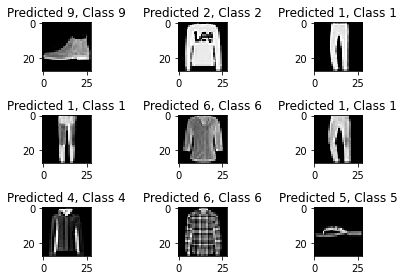

In [ ]:
for i in correct[:9]:
    plt.subplot(3,3,i+1)
    plt.imshow(test_x[i].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes1[i], actual[i]))
    plt.tight_layout()

In [ ]:
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(actual, predicted_classes1, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.76      0.89      0.82      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.85      0.87      0.86      1000
     Class 3       0.93      0.88      0.90      1000
     Class 4       0.86      0.84      0.85      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.78      0.72      0.75      1000
     Class 7       0.96      0.98      0.97      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

